## Analiza letalskih nesreč

#### Priprava podatkov

In [53]:
import csv
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
reader = csv.DictReader(open("./Podatki/PlaneCrashes.csv", 'rt', encoding='utf-8'))

### 1. Kako se število nesreč spreminja skozi čas?

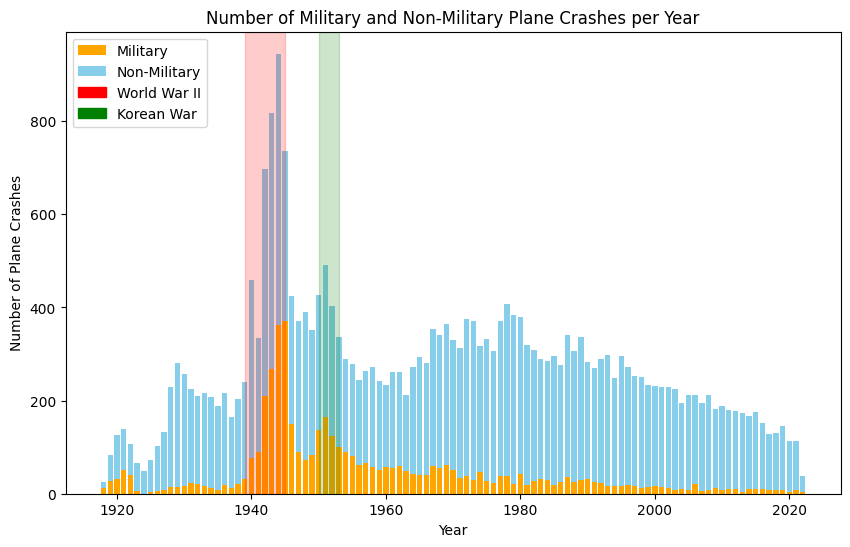

In [54]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Read the data
military_years = {}
total_years = {}

reader = csv.DictReader(open("./Podatki/PlaneCrashes.csv", 'rt', encoding='utf-8'))
for row in reader:
    datum = datetime.strptime(row['Date'], '%Y-%m-%d %H:%M:%S')
    flight_type = row['Flight type']
    if datum.year not in total_years:
        total_years[datum.year] = 1
        if flight_type == 'Military':
            military_years[datum.year] = 1
        else:
            military_years[datum.year] = 0
    else:
        total_years[datum.year] += 1
        if flight_type == 'Military':
            military_years[datum.year] += 1

x = list(total_years.keys())
y_total = [total_years[year] for year in x]
y_military = [military_years[year] for year in x]

# Plot the data
plt.figure(figsize=(10, 6))
bars_military = plt.bar(x, y_military, color='orange', label='Military')
bars_non_military = plt.bar(x, np.array(y_total) - np.array(y_military), bottom=y_military, color='skyblue', label='Non-Military')
plt.xlabel('Year')
plt.ylabel('Number of Plane Crashes')
plt.title('Number of Military and Non-Military Plane Crashes per Year')

# Annotate the most important wars and events
important_events = {
    "World War II": (1939, 1945),
    "Korean War": (1950, 1953)
    # Add more events if necessary
}

# Assign colors to each event
colors = ['red', 'green']  # You can add more colors if needed
color_map = {event: color for event, color in zip(important_events.keys(), colors)}

for event, years_range in important_events.items():
    plt.axvspan(years_range[0], years_range[1], color=color_map[event], alpha=0.2)

# Create legend
legend_labels = [bars_military, bars_non_military]
legend_labels.extend([plt.Rectangle((0,0),1,1, color=color_map[event]) for event in important_events.keys()])
legend_labels.extend(['Military', 'Non-Military'])
plt.legend(legend_labels, ['Military', 'Non-Military'] + list(important_events.keys()), loc='upper left')

plt.show()
